A notebook to interrogate any potential correlations between calculations of the lineage score (mean, variance, median, max) and a cluster's RMSD comparison to its AlphaFold structure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
import scipy as sp
from scipy import stats

plt.style.use('science')

In [2]:
'''
We need to wrangle our RMSD data a bit before we can make any calculations.
'''

rmsd = pd.read_csv('./project_pipeline/data/two-state_af_cf_compared.tsv', sep='\t')

# Create a cluster column from the filename column
rmsd['cluster'] = rmsd['cf_filename'].apply(lambda x: x.split('_')[1])

# We only need a subset of the columns
rmsd = rmsd[['uniprot', 'cluster', 'complex_rmsd', '2_comp']]

rmsd = rmsd.rename(columns={'complex_rmsd': 'Complex RMSD', '2_comp': 'IMAE'})
rmsd.head()

,uniprot,cluster,Complex RMSD,IMAE
0,O08967,U10-005,29.963,32.699
1,O08967,031,30.960,23.498
2,O08967,U10-001,29.368,27.870
3,O08967,U100-004,31.939,51.425
4,O08967,029,29.910,22.467


In [3]:
'''
Now we'll merge the RMSD data with the lineage scores.
'''

lineage = pd.read_csv('./project_pipeline/data/lineage_scores.csv')

lineage.head()

# Merge the RMSD and lineage data
merged = pd.merge(rmsd, lineage, on=['uniprot', 'cluster'])

merged.head()

,uniprot,cluster,Complex RMSD,IMAE,state,conformation,filename,uniref,taxonId,uniprot_lineage,cluster_lineage,lineage_score,uniprot_lineage_length,cluster_lineage_length
0,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A812VSQ5,2952.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 2698737, 33630, 2864, 89954, 25...",2,30,8
1,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A2G8JTM8,307972.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",7,30,15
2,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_UPI001469F9E4,52239.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",13,30,31
3,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A8C7Z9G0,183150.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",13,30,33
4,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_UPI001E1BC1D8,35525.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3331...",6,30,20


Let's look at some various measures. First we'll look at the variance.

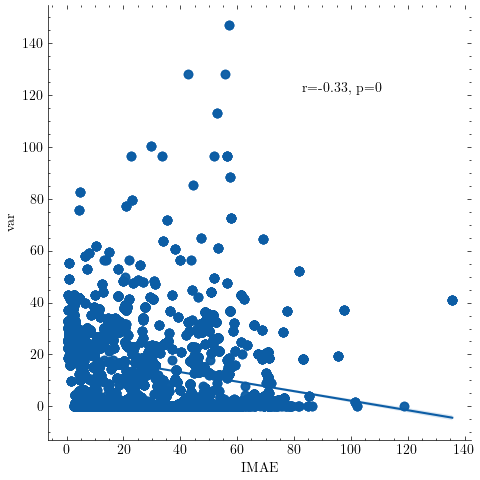

,uniprot,cluster,Complex RMSD,IMAE,state,conformation,filename,uniref,taxonId,uniprot_lineage,cluster_lineage,lineage_score,uniprot_lineage_length,cluster_lineage_length,var,mean,max
0,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A812VSQ5,2952.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 2698737, 33630, 2864, 89954, 25...",2,30,8,20.666667,7.0,13
1,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A2G8JTM8,307972.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",7,30,15,20.666667,7.0,13
2,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_UPI001469F9E4,52239.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",13,30,31,20.666667,7.0,13
3,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A8C7Z9G0,183150.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",13,30,33,20.666667,7.0,13
4,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_UPI001E1BC1D8,35525.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3331...",6,30,20,20.666667,7.0,13


In [27]:
var = merged.groupby(['uniprot', 'cluster'])['lineage_score'].transform('var')

merged['var'] = var

merged = merged.fillna(0)

def r2(x, y):
    return sp.stats.pearsonr(x, y)[0] ** 2

s = sns.lmplot(data=merged, x='IMAE', y='var')


# r, p = stats.pearsonr(merged['IMAE'], merged['var'])

# s.ax_joint.legend(['r={:.2f}, p={:.8g}'.format(r, p)])
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data['var'], data['IMAE'])
    ax = plt.gca()
    ax.text(.6, .8, 'r={:.2f}, p={:.8g}'.format(r, p),
            transform=ax.transAxes)
    
s.map_dataframe(annotate)
plt.show()
merged.head()

How about the mean?

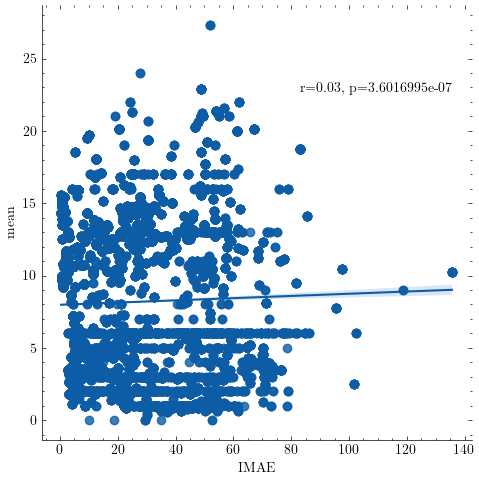

In [5]:
mean = merged.groupby(['uniprot', 'cluster'])['lineage_score'].transform('mean')

merged['mean'] = mean

s2 = sns.lmplot(data=merged, x='IMAE', y='mean')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['mean'], data['IMAE'])
    ax = plt.gca()
    ax.text(.6, .8, 'r={:.2f}, p={:.8g}'.format(r, p),
            transform=ax.transAxes)

s2.map_dataframe(annotate)
plt.show()

The max?

-0.2660872376699771 0.0


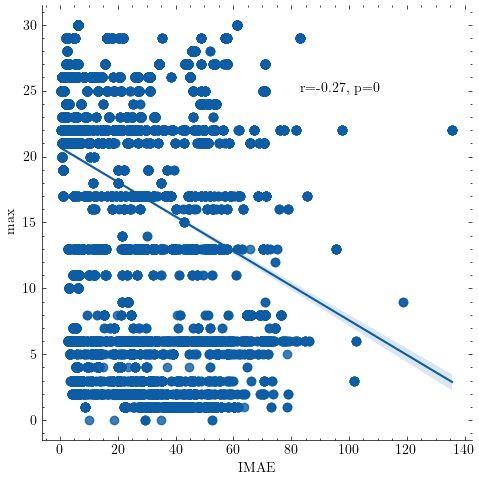

In [28]:
max = merged.groupby(['uniprot', 'cluster'])['lineage_score'].transform('max')

merged['max'] = max

g = sns.lmplot(data=merged, x='IMAE', y='max')

r, p = stats.pearsonr(merged['IMAE'], merged['max'])

# g.ax_joint.legend(['r={:.2f}, p={:.8g}'.format(r, p)])
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['max'], data['IMAE'])
    ax = plt.gca()
    ax.text(.6, .8, 'r={:.2f}, p={:.8g}'.format(r, p),
            transform=ax.transAxes)

g.map_dataframe(annotate)

# plt.show()
print(r, p)

So, only the max shows any sort of signal. Is this confounded by the number of sequences? 

In [7]:
# Need to count the number of unirefs per cluster

counts = merged.groupby(['cluster', 'uniprot']).size().reset_index(name='counts')

print(counts)

# Now we can merge the counts with the lineage scores
lineage_counts = pd.merge(merged, counts, on=['uniprot', 'cluster'])

# Get rid of any lineage scores of 0, those didn't return taxon when queried.
lineage_counts = lineage_counts[lineage_counts['lineage_score'] > 0]

lineage_counts.head()

maxc = counts.max()

       cluster uniprot  counts
0          000  O08967     395
1          000  O60741       2
2          000  P07038       2
3          000  P12931      17
4          000  P22681      97
...        ...     ...     ...
1440  U100-009  P62826      55
1441  U100-009  Q6GQQ9      90
1442  U100-009  Q8NQJ3      50
1443  U100-009  Q96BN8      93
1444  U100-009  Q9Y6K1      86

[1445 rows x 3 columns]


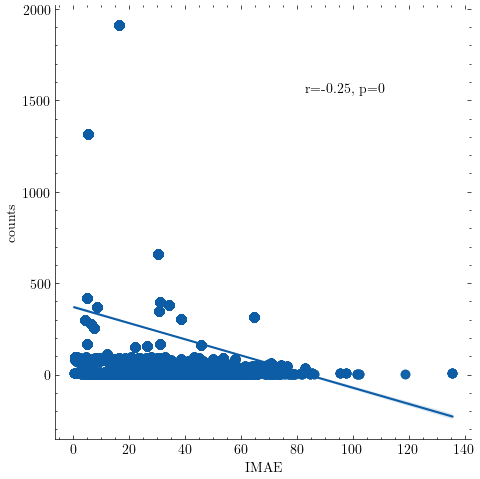

In [8]:
# Plot the relationship between the number of unirefs and the lineage score
g6 = sns.lmplot(data=lineage_counts, x='IMAE', y='counts')

def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data['counts'], data['IMAE'])
    ax = plt.gca()
    ax.text(.6, .8, 'r={:.2f}, p={:.8g}'.format(r, p),
            transform=ax.transAxes)

g6.map_dataframe(annotate)

plt.show()

The correlation is sliiiiiightly weaker, but not by much.
Let's bin the data.

What does our distribution of counts look like?

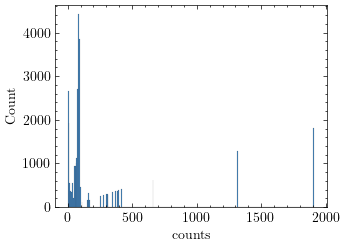

In [9]:
sns.histplot(data=lineage_counts, x='counts')

plt.show()

Pretty lopsided. Let's define some bins and see what it looks like.

In [10]:
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 2000]

lineage_counts['bins'] = pd.cut(lineage_counts['counts'], bins)

max = lineage_counts.groupby(['uniprot', 'cluster'])['lineage_score'].transform('max')

lineage_counts['max'] = max

lineage_counts.head()

,uniprot,cluster,Complex RMSD,IMAE,state,conformation,filename,uniref,taxonId,uniprot_lineage,cluster_lineage,lineage_score,uniprot_lineage_length,cluster_lineage_length,var,mean,max,counts,bins
0,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A812VSQ5,2952.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 2698737, 33630, 2864, 89954, 25...",2,30,8,20.666667,7.0,13,7,"(0, 25]"
1,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A2G8JTM8,307972.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",7,30,15,20.666667,7.0,13,7,"(0, 25]"
2,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_UPI001469F9E4,52239.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",13,30,31,20.666667,7.0,13,7,"(0, 25]"
3,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_A0A8C7Z9G0,183150.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",13,30,33,20.666667,7.0,13,7,"(0, 25]"
4,O08967,U10-005,29.963,32.699,Autoinhibited,Closed,O08967_U10-005.a3m,UniRef100_UPI001E1BC1D8,35525.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3331...",6,30,20,20.666667,7.0,13,7,"(0, 25]"


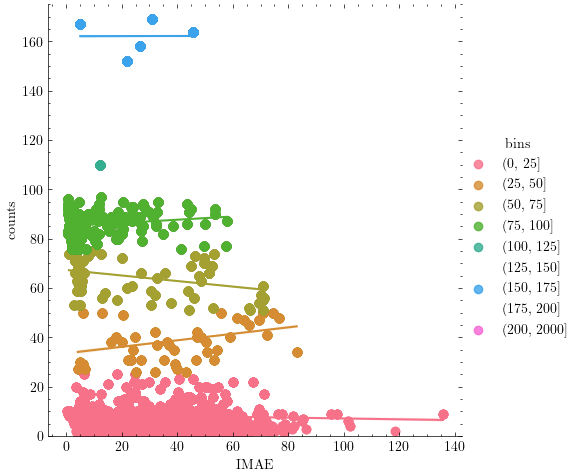

In [11]:
sns.lmplot(data=lineage_counts, x='IMAE', y='counts', hue='bins')

plt.ylim(0, 175)

plt.show()

So it seems like, within the bins, there is no correlation between IMAE and the number of sequences. Interesting.

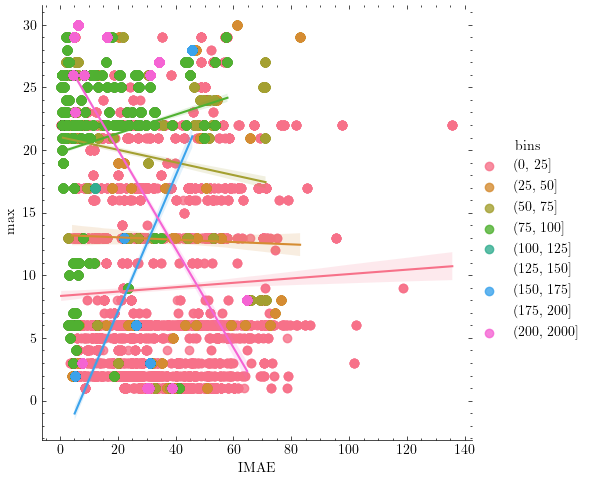

In [12]:
sns.lmplot(data=lineage_counts, x='IMAE', y='max', hue='bins')

plt.show()

Do I have any clusters with most taxa lower on the tree, but with higher number of counts?

In [13]:
many_bac = lineage_counts[(lineage_counts['cluster_lineage_length'] <= 8) & (lineage_counts['counts'] > 50)]

print(len(many_bac))

print(many_bac['cluster_lineage'])

3894
15       [131567, 2759, 2698737, 33630, 2864, 2964, 668...
62                                                [131567]
70       [131567, 2759, 2698737, 33630, 2864, 89954, 25...
76       [131567, 2759, 554915, 555280, 1485085, 555392...
129      [131567, 2759, 554915, 2605435, 2605334, 26818...
                               ...                        
28675               [131567, 2, 1783272, 1154676, 2599633]
28676                             [131567, 2, 1224, 81684]
28679    [131567, 2, 1783272, 201174, 1760, 85007, 1762...
28680    [131567, 2, 1783272, 67819, 1663419, 1663425, ...
28681    [131567, 2, 1783272, 201174, 1760, 85009, 8501...
Name: cluster_lineage, Length: 3894, dtype: object


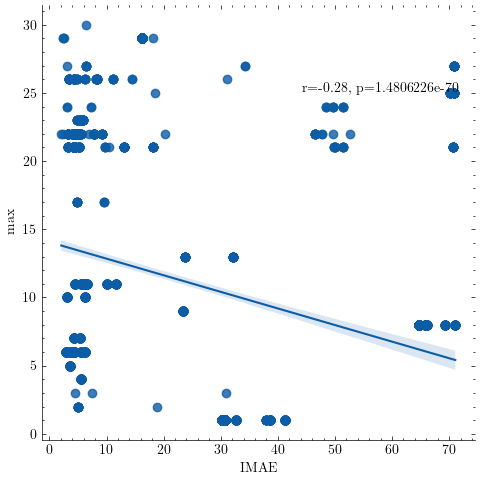

In [14]:
g8 = sns.lmplot(data=many_bac, x='IMAE', y='max')

def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data['max'], data['IMAE'])
    ax = plt.gca()
    ax.text(.6, .8, 'r={:.2f}, p={:.8g}'.format(r, p),
            transform=ax.transAxes)

g8.map_dataframe(annotate)
plt.show()

How about clusters with large lineage scores, but few sequences? (This will be quite telling)

In [15]:
few_euk = lineage_counts[(lineage_counts['lineage_score'] >= 20) & (lineage_counts['counts'] < 50)]

print(len(few_euk))

433


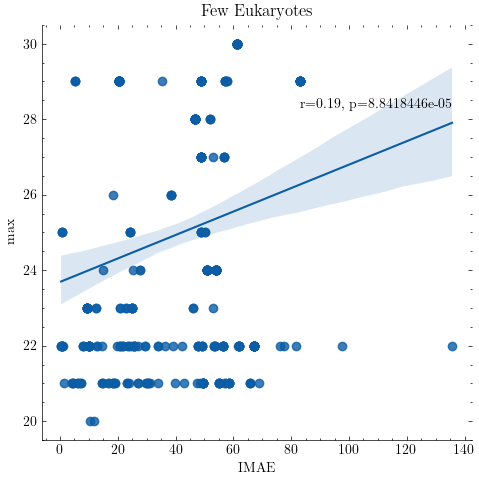

In [16]:
g9 = sns.lmplot(data=few_euk, x='IMAE', y='max')

plt.title('Few Eukaryotes')
g9.map_dataframe(annotate)
plt.show()

Find the best-matching clusters for both the "active" and "autoinhibited" structures for my two-state proteins.

Look at the correlation for all structures.

In [17]:
# cf_pdb = pd.read_csv('./project_pipeline/data/two-state_cf_pdb_compared.tsv', sep='\t')

# cf_pdb = cf_pdb[['uniprot', 'cluster', 'region_1', 'region_2', '2_comp', 'pdb', 'state', 'conformation']]

# cf_pdb = cf_pdb.rename(columns={'2_comp': 'IMAE'})

# active = cf_pdb[cf_pdb['state'] == 'Active']

# auto = cf_pdb[cf_pdb['state'] == 'Autoinhibited']

# # Merge the lineage scores in

# all_merged = pd.merge(cf_pdb, lineage, on=['uniprot', 'cluster'])

# active_merged = pd.merge(active, lineage, on=['uniprot', 'cluster'])

# auto_merged = pd.merge(auto, lineage, on=['uniprot', 'cluster'])


In [18]:
# ac_max = active_merged.groupby(['uniprot', 'cluster'])['lineage_score'].transform('max')

# active_merged['max'] = ac_max

# au_max = auto_merged.groupby(['uniprot', 'cluster'])['lineage_score'].transform('max')

# auto_merged['max'] = au_max

# auto_merged = auto_merged.rename(columns={'2_comp': 'IMAE', 'state_x': 'state', 'conformation_x': 'conformation', 
#                                   'state_y': 'af_state', 'conformation_y': 'af_conformation'})

# active_merged = active_merged.rename(columns={'2_comp': 'IMAE', 'state_x': 'state', 'conformation_x': 'conformation', 
#                                   'state_y': 'af_state', 'conformation_y': 'af_conformation'})

In [19]:
'''
First we find the minimum for the active structures
'''

cf_pdb = pd.read_csv('./project_pipeline/data/two-state_cf_pdb_compared.tsv', sep='\t')

active = cf_pdb[cf_pdb['state'] == 'Active']

auto = cf_pdb[cf_pdb['state'] == 'Autoinhibited']

# Find the minimum 2_comp for each protein's Active state structure.
pmin = active.groupby('uniprot').agg({'2_comp': 'min'})

# Filter our active dataframe to those minimums
active = pd.merge(pmin, active, on=['uniprot', '2_comp'], how='left')

# Get rid of unnecessary columns
active = active[['uniprot', '2_comp', 'pdb', 'cluster', 'region_1', 'region_2', 'state', 'conformation']]

# Now repeat for autoinhibited
amin = auto.groupby('uniprot').agg({'2_comp': 'min'})

# Filter our auto dataframe to these minimums
auto = pd.merge(amin, auto, on=['uniprot', '2_comp'], how='left')

# We have two pdb files compared to the same cluster that have the same 2_comp, so we'll just drop one
auto = auto.drop_duplicates(subset='uniprot')

# Keep only the relevant columns
auto = auto[['uniprot', '2_comp', 'pdb', 'cluster', 'region_1', 'region_2', 'state', 'conformation']]

In [20]:
# Combine the two dataframes
lowest = pd.concat([active, auto])

lowest = lowest.sort_values(by='uniprot')

# Add the lineage values 
merged2 = pd.merge(lowest, lineage, on=['uniprot', 'cluster'])

merged2 = merged2.rename(columns={'2_comp': 'IMAE', 'state_x': 'state', 'conformation_x': 'conformation', 
                                  'state_y': 'af_state', 'conformation_y': 'af_conformation'})

auto_merged = pd.merge(auto, lineage, on=['uniprot', 'cluster'])

active_merged = pd.merge(active, lineage, on=['uniprot', 'cluster'])

active_merged.head()

,uniprot,2_comp,pdb,cluster,region_1,region_2,state_x,conformation_x,state_y,conformation_y,filename,uniref,taxonId,uniprot_lineage,cluster_lineage,lineage_score,uniprot_lineage_length,cluster_lineage_length
0,O08967,12.2,6bbq,U100-001,"251-265,383-395",77-206,Active,Open,Autoinhibited,Closed,O08967_U100-001.a3m,UniRef100_UPI0017818AE4,28610.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3331...",6,30,31
1,O08967,12.2,6bbq,U100-001,"251-265,383-395",77-206,Active,Open,Autoinhibited,Closed,O08967_U100-001.a3m,UniRef100_A0A8C1NVI0,7962.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",13,30,28
2,O08967,12.2,6bbq,U100-001,"251-265,383-395",77-206,Active,Open,Autoinhibited,Closed,O08967_U100-001.a3m,UniRef100_A0A8R1YG29,NaN,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...",[],0,30,0
3,O08967,12.2,6bbq,U100-001,"251-265,383-395",77-206,Active,Open,Autoinhibited,Closed,O08967_U100-001.a3m,UniRef100_UPI000D71F360,13735.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 33154, 33208, 6072, 33213, 3351...",17,30,26
4,O08967,12.2,6bbq,U100-001,"251-265,383-395",77-206,Active,Open,Autoinhibited,Closed,O08967_U100-001.a3m,UniRef100_A0A0M0JU28,1460289.0,"[131567, 2759, 33154, 33208, 6072, 33213, 3351...","[131567, 2759, 2608109, 2830, 2608131, 73028, ...",2,30,8


In [21]:
ac_max = active_merged.groupby(['uniprot', 'cluster'])['lineage_score'].transform('max')

active_merged['max'] = ac_max

au_max = auto_merged.groupby(['uniprot', 'cluster'])['lineage_score'].transform('max')

auto_merged['max'] = au_max

auto_merged = auto_merged.rename(columns={'2_comp': 'IMAE', 'state_x': 'state', 'conformation_x': 'conformation', 
                                  'state_y': 'af_state', 'conformation_y': 'af_conformation'})

active_merged = active_merged.rename(columns={'2_comp': 'IMAE', 'state_x': 'state', 'conformation_x': 'conformation', 
                                  'state_y': 'af_state', 'conformation_y': 'af_conformation'})
max2 = merged2.groupby(['uniprot', 'cluster'])['lineage_score'].transform('max')

merged2['max'] = max2

var2 = merged2.groupby(['uniprot', 'cluster'])['lineage_score'].transform('var')

merged2['var'] = var2

mean2 = merged2.groupby(['uniprot', 'cluster'])['lineage_score'].transform('mean')

merged2['mean'] = mean2

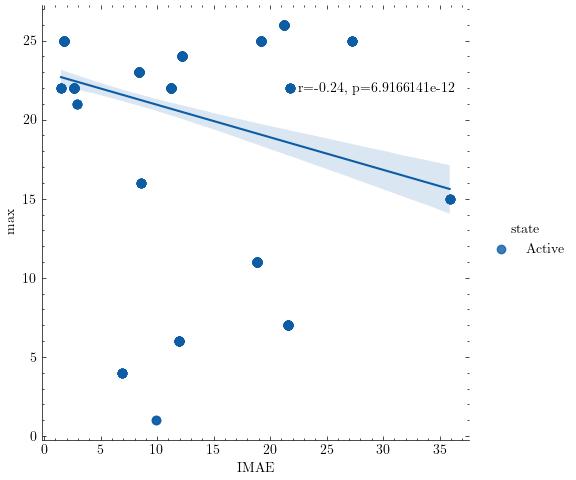

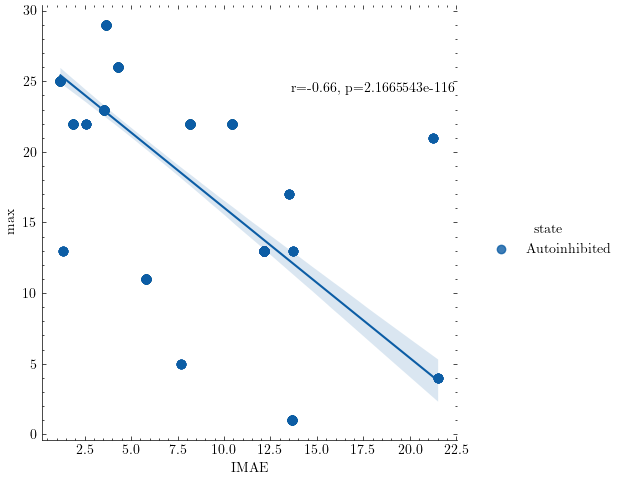

In [22]:
g2 = sns.lmplot(data=active_merged, x='IMAE', y='max', hue='state')

g3 = sns.lmplot(data=auto_merged, x='IMAE', y='max', hue='state')

# g4 = sns.lmplot(data=merged2, x='IMAE', y='mean')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['max'], data['IMAE'])
    ax = plt.gca()
    ax.text(.6, .8, 'r={:.2f}, p={:.8g}'.format(r, p),
            transform=ax.transAxes)

g2.map_dataframe(annotate)
g3.map_dataframe(annotate)
# g4.map_dataframe(annotate)